# 聚类算法
聚类是一种无监督学习方法，用于将数据集划分为多个组（簇），使得同一组内的数据点相似度较高，而不同组之间的数据点相似度较低。

## 常见聚类算法
1. **K-Means**：
   - 基于距离的划分聚类算法。
   - 通过迭代优化簇内数据点到簇中心的距离平方和，找到最优的簇划分。

2. **层次聚类**：
   - 基于树状结构的聚类方法。
   - 包括自底向上（凝聚层次聚类）和自顶向下（分裂层次聚类）两种方式。

3. **DBSCAN**：
   - 基于密度的聚类算法。
   - 能够发现任意形状的簇，并能自动识别噪声点。

4. **Gaussian Mixture Model (GMM)**：
   - 基于概率模型的聚类算法。
   - 假设数据由多个高斯分布组成，通过期望最大化（EM）算法估计参数。

## 应用场景
- 图像分割
- 客户分群
- 文本聚类
- 异常检测

In [73]:
# 导入必要的库
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]='SimHei'#解决中文乱码
plt.rcParams['axes.unicode_minus'] = False#解决负号无法正常显示的问题
plt.rcParams['figure.dpi']=100

这段代码使用 `matplotlib.pyplot` 模块中的 `scatter` 函数绘制散点图。

1. **`X[:, 0]` 和 `X[:, 1]`**：
   - `X` 是一个二维数组，表示数据点的坐标。
   - `X[:, 0]` 提取所有数据点的第一个维度（横坐标）。
   - `X[:, 1]` 提取所有数据点的第二个维度（纵坐标）。

2. **`s=50`**：
   - 指定散点的大小为 50。
   - 数值越大，散点的尺寸越大。

3. **功能**：
   - 该代码将数据集中每个点的横坐标和纵坐标绘制在二维平面上，形成一个散点图。
   - 散点图通常用于可视化数据的分布和模式。

4. **应用场景**：
   - 在聚类任务中，散点图可以直观地展示数据点的分布情况，帮助分析数据的聚类结构或分组特性。

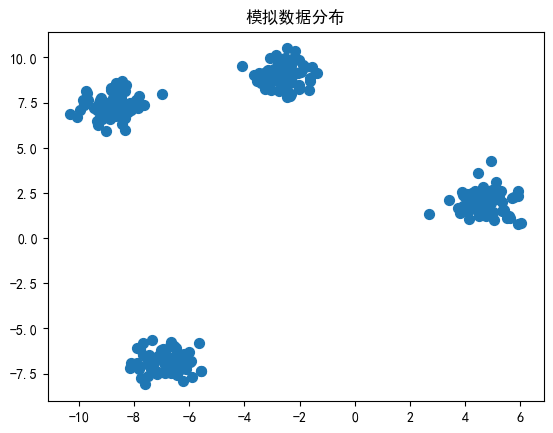

In [74]:
# 生成模拟数据
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# 可视化数据
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("模拟数据分布")
plt.show()

`make_blobs` 是 `sklearn.datasets` 模块中的一个函数，用于生成模拟的聚类数据集。它通常用于测试和验证聚类算法的效果。

在这段代码中：

1. **`n_samples=300`**：
   - 指定生成的数据点总数为 300 个。

2. **`centers=4`**：
   - 指定数据集包含 4 个簇（即 4 个中心点）。

3. **`cluster_std=0.6`**：
   - 指定每个簇的标准差为 0.6，控制簇的紧密程度。值越小，簇内的数据点越集中；值越大，簇内的数据点越分散。

4. **`random_state=42`**：
   - 设置随机数种子，以确保每次运行生成的数据集相同，便于结果的可重复性。

最终，`make_blobs` 返回两个值：
- **`X`**：一个二维数组，表示生成的 300 个数据点的坐标。
- **`y`**：一个一维数组，表示每个数据点所属的簇标签（0 到 3）。

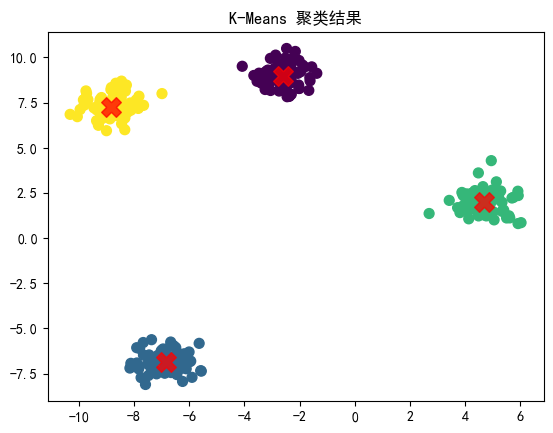

In [75]:
# 使用 K-Means 进行聚类
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 可视化聚类结果
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means 聚类结果")
plt.show()

### 结果分析
通过 K-Means 算法对模拟数据进行聚类，可以观察到数据被划分为 4 个簇，每个簇的中心用红色标记。

In [76]:
import matplotlib.pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score#sklearn.metrics 模块中的一个函数，用于评估聚类算法的性能。它也被称为方差比准则（Variance Ratio Criterion）

 n_features维度,centers簇中心

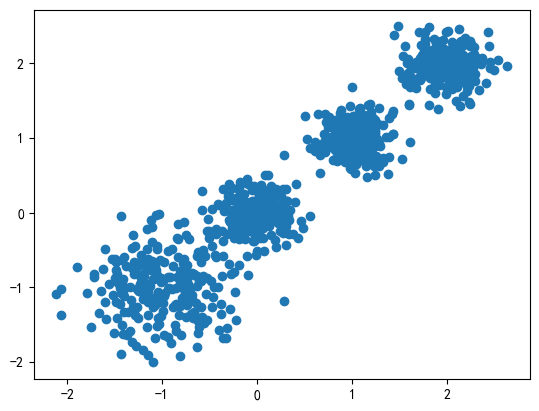

In [ ]:
x, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1, -1], [0, 0], [1, 1], [2, 2]], cluster_std=[0.4, 0.2, 0.2, 0.2], random_state=9)
plt.scatter(x[:, 0], x[:, 1], marker='o')#前两列
plt.show()

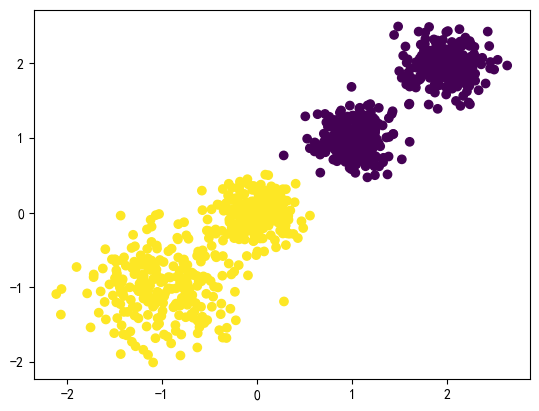

3116.1706763322227


In [ ]:
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()
print(calinski_harabasz_score(x, y_pred))#方差比准则，它是一种评估聚类效果的指标。高分表示好的聚类

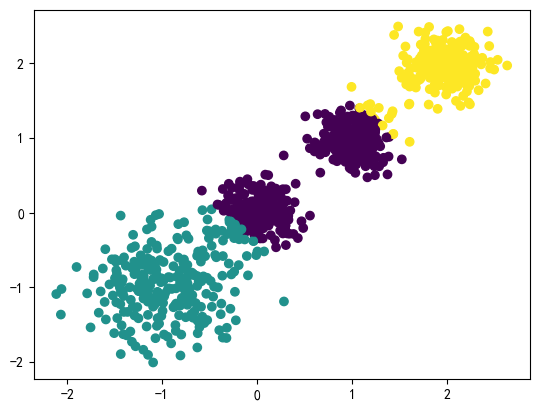

2896.6944904852235


In [79]:
y_pred = KMeans(n_clusters=3, random_state=9).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()
print(calinski_harabasz_score(x, y_pred))

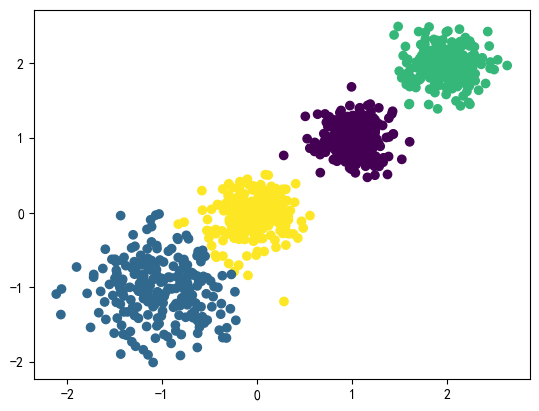

5923.96040443529


In [80]:
y_pred = KMeans(n_clusters=4, random_state=9).fit_predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_pred)
plt.show()
print(calinski_harabasz_score(x, y_pred))

# K-Means 算法实现流程

K-Means 是一种基于距离的聚类算法，以下是其实现流程：

1. **初始化簇中心**：
   - 随机选择 `k` 个数据点作为初始簇中心。

2. **分配数据点到最近的簇**：
   - 计算每个数据点到所有簇中心的距离。
   - 将数据点分配到距离最近的簇。

3. **更新簇中心**：
   - 计算每个簇内所有数据点的均值，并将其作为新的簇中心。

4. **重复迭代**：
   - 重复步骤 2 和步骤 3，直到簇中心不再发生变化或达到最大迭代次数。

5. **输出结果**：
   - 返回每个数据点的簇标签和最终的簇中心。

### 注意事项
- **初始簇中心的选择**：初始簇中心的选择会影响算法的收敛速度和最终结果。
- **距离度量**：通常使用欧几里得距离作为度量标准。
- **收敛条件**：可以通过簇中心的变化量或最大迭代次数来判断是否收敛。

### 应用场景
- 图像分割
- 文本聚类
- 客户分群
- 数据压缩

# K-Means 算法的优缺点

## 优点
1. **简单易实现**：
   - 算法逻辑简单，易于理解和实现。
2. **高效性**：
   - 时间复杂度为 \(O(n \cdot k \cdot t)\)，其中 \(n\) 是样本数，\(k\) 是簇数，\(t\) 是迭代次数。
3. **适用性广**：
   - 适用于大多数聚类任务，尤其是数据分布较为均匀的情况。
4. **结果可解释性强**：
   - 聚类结果直观，易于可视化和解释。

## 缺点
1. **对初始值敏感**：
   - 初始簇中心的选择会影响最终结果，可能陷入局部最优。
2. **需要预先指定簇数 \(k\)**：
   - 需要用户提前指定簇数，可能导致结果不准确。
3. **对噪声和异常值敏感**：
   - 噪声点或异常值可能显著影响簇中心的计算，导致聚类结果偏差。
4. **仅适用于凸形簇**：
   - 假设簇是球形的，难以处理非凸形状的簇。
5. **对特征缩放敏感**：
   - 特征值的量纲和范围会影响距离计算，因此需要对数据进行标准化或归一化处理。

### 适用场景
- 数据分布较为均匀且簇形状接近球形的场景。
- 需要快速聚类的任务，如图像压缩、客户分群等。